# Costomer Churn Project Plan

## Intro

In this project we will be forcasting the churn of  telecom operator Interconnect.
This inital notbook entry will be clarifying and colecting all information necisary to compleat this project and to also confirm with stake holders a plan of action. 

# EDA

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

### Load Data

In [2]:
df_1 = pd.read_csv('/datasets/final_provider/contract.csv')
df_2 = pd.read_csv('/datasets/final_provider/personal.csv')
df_3 = pd.read_csv('/datasets/final_provider/internet.csv')
df_4 = pd.read_csv('/datasets/final_provider/phone.csv')

print("Contract Data:")
display(df_1.head())

print("Personal Data:")
display(df_2.head())

print("Internet Data:")
display(df_3.head())

print("Phone Data:")
display(df_4.head())

df_merged = pd.merge(df_1, df_2, on='customerID', how='inner')

df_merged = pd.merge(df_merged, df_3, on='customerID', how='inner')

df_merged = pd.merge(df_merged, df_4, on='customerID', how='inner')

display(df_merged.head())

Contract Data:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Personal Data:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Internet Data:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Phone Data:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
1,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
2,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
3,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
4,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes


Our data looks to be in good order so far. I decided to merge the data into one data set so we can use all the data when training any ML modles.

### Data Overview

In [3]:
print(df_merged.info())
print(df_merged.describe())
print(df_merged.isnull().sum())
print(df_merged.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4835 entries, 0 to 4834
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4835 non-null   object 
 1   BeginDate         4835 non-null   object 
 2   EndDate           4835 non-null   object 
 3   Type              4835 non-null   object 
 4   PaperlessBilling  4835 non-null   object 
 5   PaymentMethod     4835 non-null   object 
 6   MonthlyCharges    4835 non-null   float64
 7   TotalCharges      4835 non-null   object 
 8   gender            4835 non-null   object 
 9   SeniorCitizen     4835 non-null   int64  
 10  Partner           4835 non-null   object 
 11  Dependents        4835 non-null   object 
 12  InternetService   4835 non-null   object 
 13  OnlineSecurity    4835 non-null   object 
 14  OnlineBackup      4835 non-null   object 
 15  DeviceProtection  4835 non-null   object 
 16  TechSupport       4835 non-null   object 


Our data types have a couple problems. begindate and enddate needs to be changed from object to datetime64. The rest of the columns will be changed later with OHE techneaks or binary techneaks. exept for costomer ID that will always stay the same.

### data cleaning

In [4]:
df_merged['BeginDate'] = pd.to_datetime(df_merged['BeginDate'], errors='coerce')
df_merged['EndDate'] = pd.to_datetime(df_merged['EndDate'], errors='coerce')

df_merged['TotalCharges'] = pd.to_numeric(df_merged['TotalCharges'], errors='coerce')
print(df_merged['TotalCharges'].isna().sum()) 
df_merged = df_merged.dropna(subset=['TotalCharges'])
df_merged = df_merged.reset_index(drop=True)
print(df_merged['TotalCharges'].isna().sum())
yes_no_columns = [
    'PaperlessBilling', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]
df_merged[yes_no_columns] = df_merged[yes_no_columns].replace({'Yes': 1, 'No': 0})

print(df_merged.info())

3
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4832 entries, 0 to 4831
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        4832 non-null   object        
 1   BeginDate         4832 non-null   datetime64[ns]
 2   EndDate           1586 non-null   datetime64[ns]
 3   Type              4832 non-null   object        
 4   PaperlessBilling  4832 non-null   int64         
 5   PaymentMethod     4832 non-null   object        
 6   MonthlyCharges    4832 non-null   float64       
 7   TotalCharges      4832 non-null   float64       
 8   gender            4832 non-null   object        
 9   SeniorCitizen     4832 non-null   int64         
 10  Partner           4832 non-null   int64         
 11  Dependents        4832 non-null   int64         
 12  InternetService   4832 non-null   object        
 13  OnlineSecurity    4832 non-null   int64         
 14  OnlineBackup      48

A basic date time will not help our ML model but it will help us later with feature engineering. This will also convert all EndDate columns that are filled with 'No' to 'NaT'.
Total Charges needs to be changed to a float64.
We also need to convert all our binary columns ("yes"or"no") to 0 or 1.


### Featur engineering

#### Tenure

In [5]:
today = pd.to_datetime('today')

df_merged['EndDateFilled'] = df_merged['EndDate'].fillna(today)
df_merged['tenure_days'] = (df_merged['EndDateFilled'] - df_merged['BeginDate']).dt.days
df_merged['tenure_months'] = (df_merged['tenure_days'] / 30).round()

#### Churn

In [6]:
df_merged['churn'] = df_merged['EndDate'].notna().astype(int)

#### Contract type

In [7]:
df_merged['Type'].value_counts()

Month-to-month    2975
One year           964
Two year           893
Name: Type, dtype: int64

In [8]:
contract = {
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
}
df_merged['contract_length_months'] = df_merged['Type'].map(contract)

For featur engeering I added the tenure (how long the have been a costomer), Churn (if they have left or not), and 'contract_length_months' (how many months they have bean with the company).

### Target Variable Distribution

Churn Value Counts:
 0    3246
1    1586
Name: churn, dtype: int64

Churn Percentages:
 0    67.18
1    32.82
Name: churn, dtype: float64


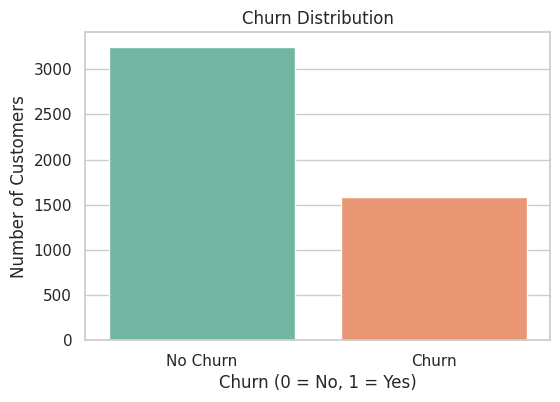

In [9]:
# Count values
churn_counts = df_merged['churn'].value_counts()
churn_percent = churn_counts / len(df_merged) * 100

# counts and percentages
print("Churn Value Counts:\n", churn_counts)
print("\nChurn Percentages:\n", churn_percent.round(2))

# Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df_merged, x='churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.xticks([0,1], ['No Churn', 'Churn'])
plt.show()

We have an odd split that we will have to deal with.
I sugest using stratified train/test splits or to consider balancing during modeling (SMOTE, oversampling, undersampling, or class_weight='balanced')

### Categorical Feature Exploration

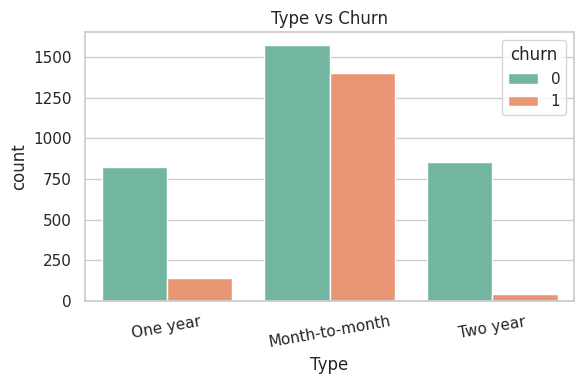

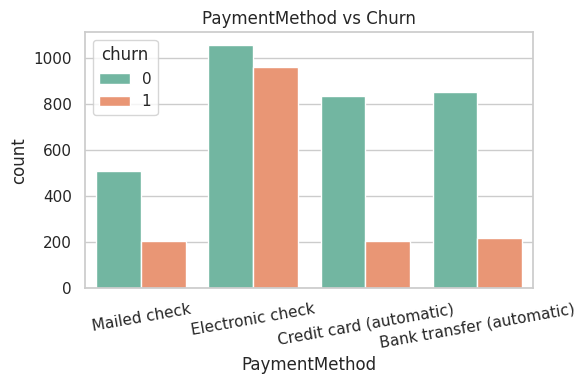

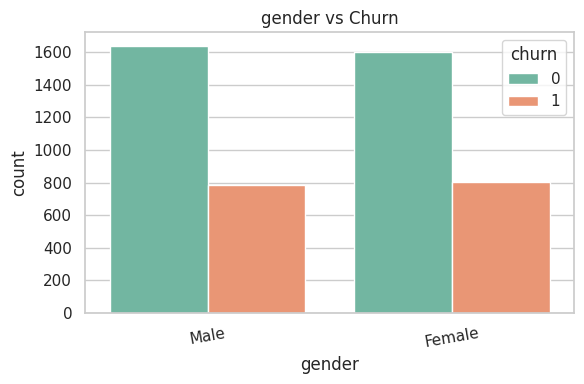

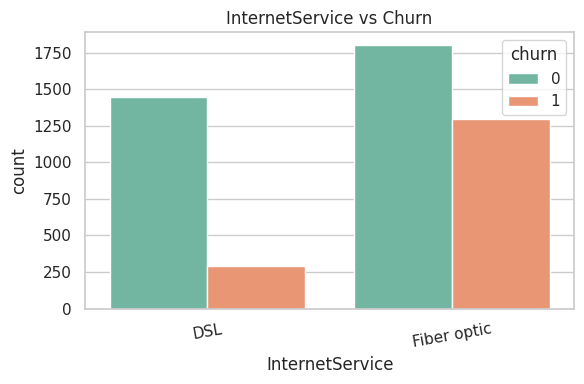

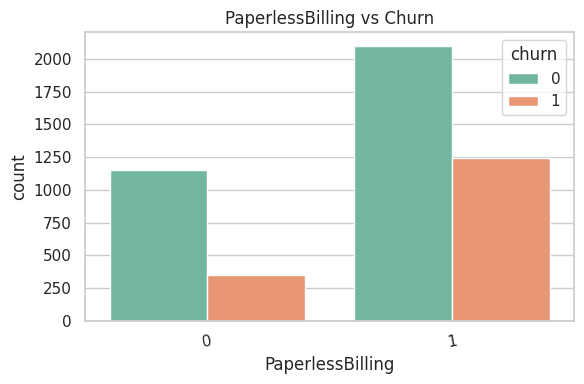

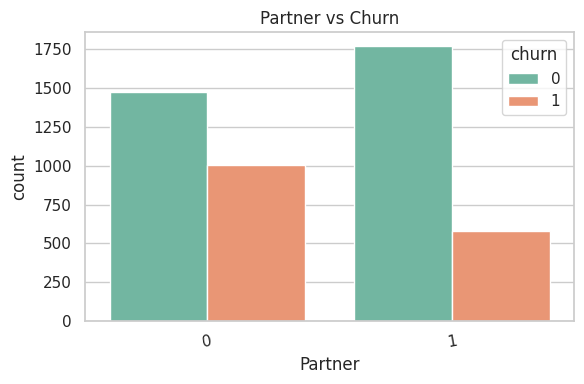

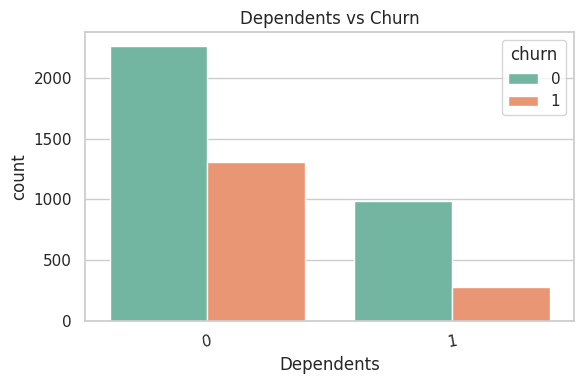

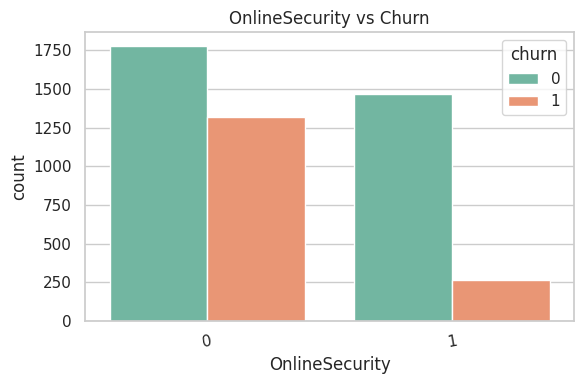

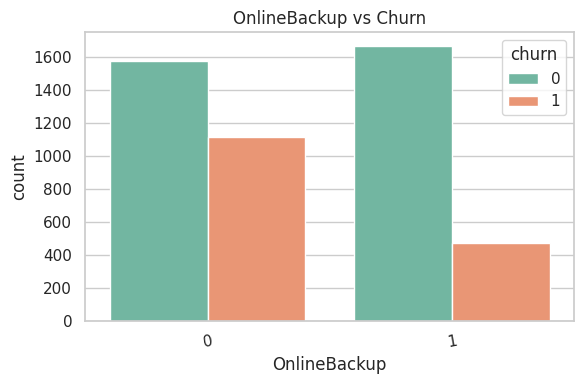

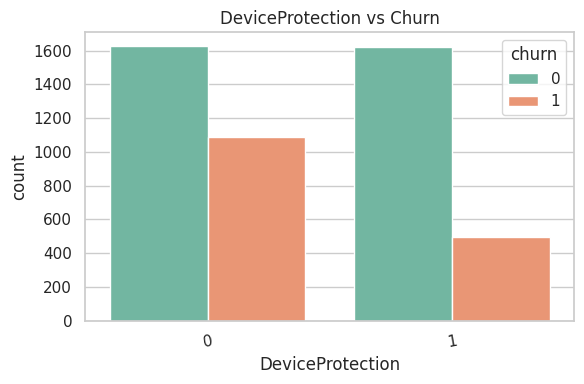

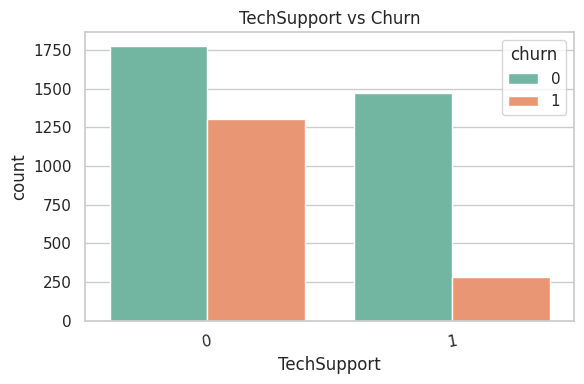

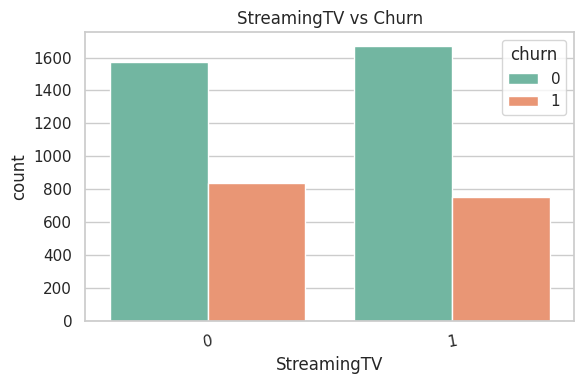

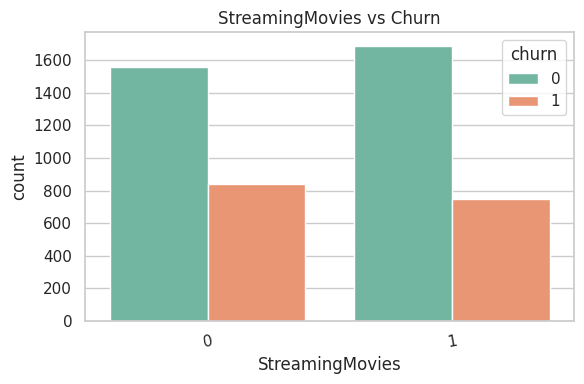

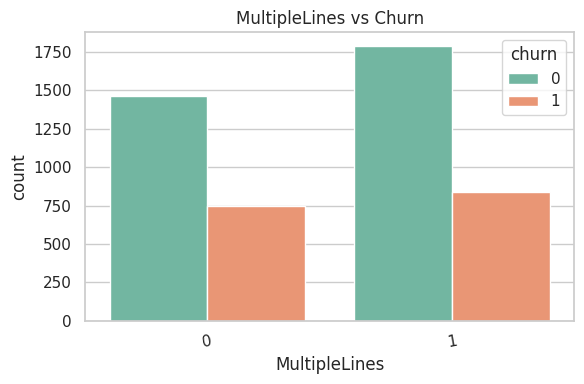

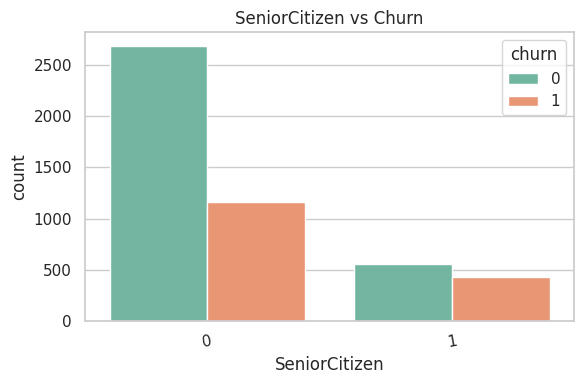

In [10]:
categorical_cols = [
    'Type', 'PaymentMethod', 'gender', 'InternetService',
    'PaperlessBilling', 'Partner', 'Dependents',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'MultipleLines', 'SeniorCitizen'
]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_merged, x=col, hue='churn', palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=10)
    plt.tight_layout()
    plt.show()


There are a couple catagories that we can see that the churn is significantly higher.
- month to month plans
- electronic check
- fiber optic internet service
- paperless billing
- no partner
- no dependants
- no online security
- no device protection
- no tech suport
- are siniors(high churn may be because of death)
This should be kept in mind for posable solutions.

Gender is not sugnificant and can be removed.

### Numerical Feature Exploration

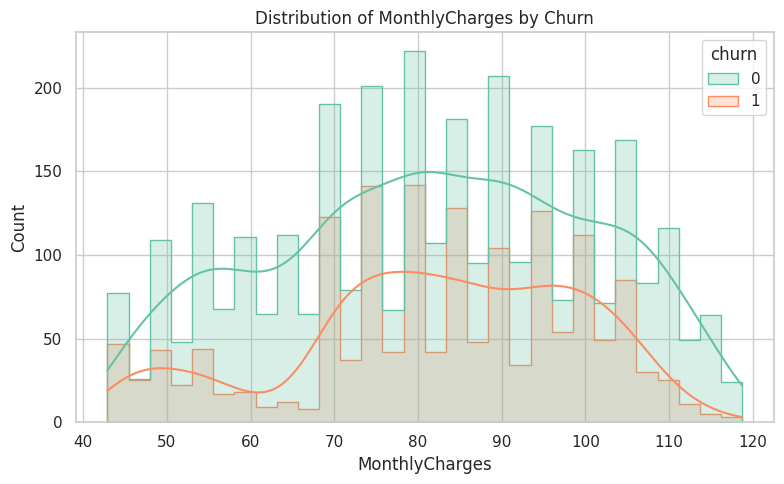

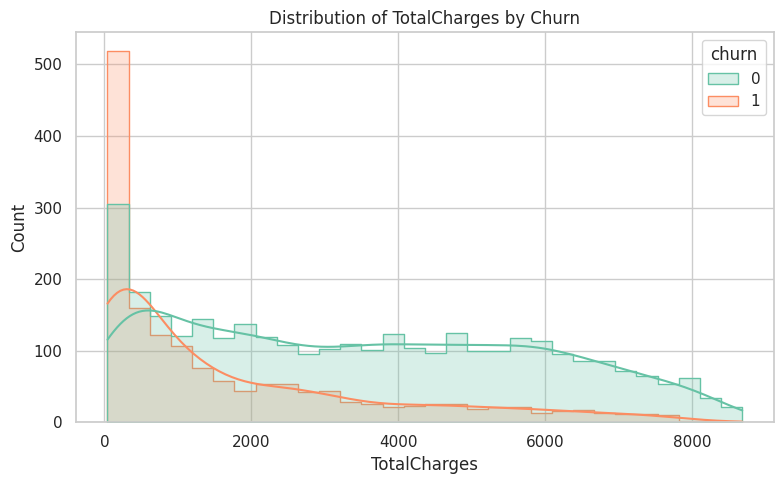

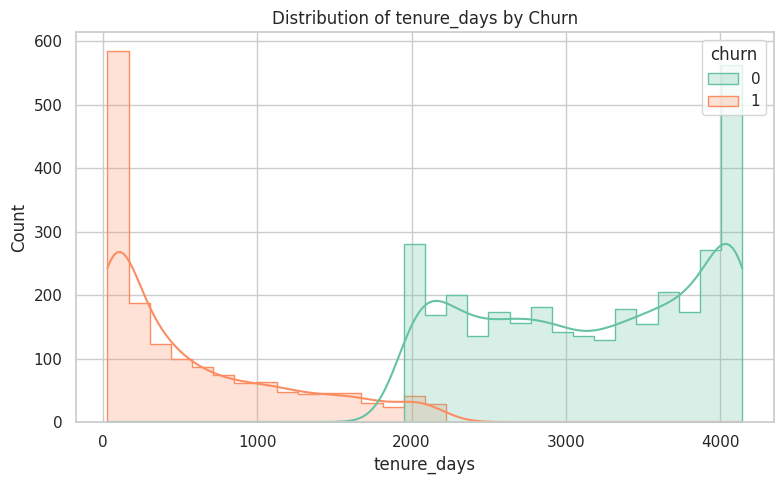

In [ ]:
numerical_cols = ['MonthlyCharges', 'TotalCharges', 'tenure_days', 'tenure_months']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_merged, x=col, hue='churn', kde=True, bins=30, palette='Set2', element='step')
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()



The monthly charge catagory or churn is the sugnificantly less from 50$ to 65%. 

The total charges catagory after about 1500$ of total charges or churn stays relitivly consistant in decrease. this points to laving loyal costomers after this point. 

Our churn for our members is sugnificantly more in the first stretch of there plan.
specifically in the first 10 months. This points to our Month to month plan having a high churn rate.

In [ ]:
#### Outliers

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_merged, x='churn', y=col, palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.tight_layout()
    plt.show()


we dont have any sugnificant outliers except in our total charges column andin the churned catagory. 
These outliers still might not be sugnificant. requires further investigation when making our models. 

### Correlation Analysis

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_merged[numerical_cols + ['churn']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Churn")
plt.tight_layout()
plt.show()


here we can see that total charges coralates with tenure and monthly charges.
we can also see that churn negetivly coralates with tenure and somewhat negetivly with total charges.

### Feature Encoding (OHE)

In [ ]:
ohe_cols = ['Type', 'PaymentMethod', 'InternetService']

df_encoded = pd.get_dummies(df_merged, columns=ohe_cols, drop_first=False)

print(df_encoded.shape)
print(df_encoded.columns)


using the OHE method we can make Type, Payment method, and Internet Service columns usable with our ML models. 
We are not including gender because it has no sugnificance in our data. We should not use it when training our models.

## Conclusion

In this project, we aim to predict customer churn for the telecom provider Interconnect using classification based machine learning models. As part of the initial exploratory data analysis (EDA), the data was merged into a single dataset to provide a complete view of each customer. Key preprocessing steps included converting date columns to datetime format, converting binary “Yes/No” fields into numerical values, and casting the TotalCharges column to a float for numerical analysis. New features such as customer tenure and contract length were engineered to enhance model input.

The target variable churn shows an imbalanced distribution, which we will address through stratified splitting or balancing techniques during model training. Preliminary analysis identified several categorical features—such as contract type, payment method, internet service, and lack of technical support—that are strongly associated with higher churn. Additionally, customers are more likely to churn within their first 10 months, and higher monthly or total charges show varying effects on churn likelihood. One hot encoding will be used to handle categorical variables, while features with no predictive value, such as gender, should be excluded.

Overall, the dataset is now well-structured for machine learning. The insights gained during this EDA will inform our modeling approach using algorithms such as Decision Trees, Random Forest, XGBoost, and others, with the goal of accurately forecasting churn and identifying actionable patterns for the business.

IMPORTANT: 'churn' is now the target.

## Plan Of Action

1. Data Preparation
Finalize data cleaning: ensure correct data types, handle missing values (e.g., EndDate), and complete binary and one-hot encoding for categorical features. Remove any irrelevant columns like customerID and features with no predictive power.

2. Feature Engineering:
Use existing columns to create meaningful features such as tenure, contract_length_months, and churn.
Consider scaling numerical features if required by certain models.

3. Train/Test Split and Class Balancing:
Split the data using a stratified approach to maintain class distribution. If imbalance persists, apply techniques like SMOTE, class weighting, or resampling to balance the churn classes.

4. Model Training and Evaluation:
Train and compare classification models such as Decision Tree, Random Forest, XGBoost, LightGBM, and CatBoost. Posably use cross-validation and appropriate metrics such as:

Precision - Tells you how many customers predicted to churn actually do.
perfect for if you want to avoid wasting effort on customers who weren’t going to churn.

Recall - Tells you how many actual churners were correctly predicted.
perfect for when it is more important to catch every churner, even if it means more false positives.

F1-score (recommended) - Balances precision and recall.
great for when you want a happy middle of the two above options.
This metric is also good when you have an imbalanced in our data. Our data is about a 70-30 split

ROC-AUC (required) - Measures how well the model can separate churn vs not churn at different thresholds.
This is especialy usfull because we are comparing several models.

5. Interpretation and Recommendations:
Analyze feature importance and model outputs to identify key churn drivers. Prepare actionable insights and suggest business strategies to reduce churn based on the findings.

## clarifying question

Is it more important to identify all potential churners (high recall) or to be sure that predicted churners are truly at risk (high precision)?

What is the acceptable trade-off between false positives and false negatives in this context?

Is there any historical event such as policy change or marketing campaigns we should be aware of that might affect the data?

Who will use the chosen model’s output, and in what format?

What metric will define success for this model?
example: ROI of retention campaigns, more retained revenue or high ROC-AUC.

Is there a benchmark or existing model we should compare against?
